# John Joseph Ali
## 18CJ024123
### Code For Plotting the Data

# African Countries

In [1]:
african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Comoros", "Congo", "Congo, Democratic Republic of", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Swaziland", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

In [2]:
len(african_countries)

54

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('cleaned_data.csv')

In [4]:
df

,Unnamed: 0,SpatialDim,TimeDim,NumericValue,Country
0,965,AFG,2020,12000.0,Afghanistan
1,966,ALB,2020,1400.0,Albania
2,967,DZA,2020,18000.0,Algeria
3,968,AGO,2020,340000.0,Angola
4,969,ARG,2020,140000.0,Argentina
...,...,...,...,...,...
1488,3753,JOR,2010,500.0,Jordan
1489,3754,MNG,2010,500.0,Mongolia
1490,3755,SVN,2010,640.0,Slovenia
1491,3756,SYR,2010,510.0,Syrian Arab Republic


In [5]:
df = df[['SpatialDim', 'TimeDim', 'NumericValue', 'Country']]

In [6]:
df

,SpatialDim,TimeDim,NumericValue,Country
0,AFG,2020,12000.0,Afghanistan
1,ALB,2020,1400.0,Albania
2,DZA,2020,18000.0,Algeria
3,AGO,2020,340000.0,Angola
4,ARG,2020,140000.0,Argentina
...,...,...,...,...
1488,JOR,2010,500.0,Jordan
1489,MNG,2010,500.0,Mongolia
1490,SVN,2010,640.0,Slovenia
1491,SYR,2010,510.0,Syrian Arab Republic


# Filtering Data to leave only African Countries

In [7]:
df1 = df[(df['Country'].isin(african_countries))]


AttributeError: 'AxesSubplot' object has no attribute 'std'

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


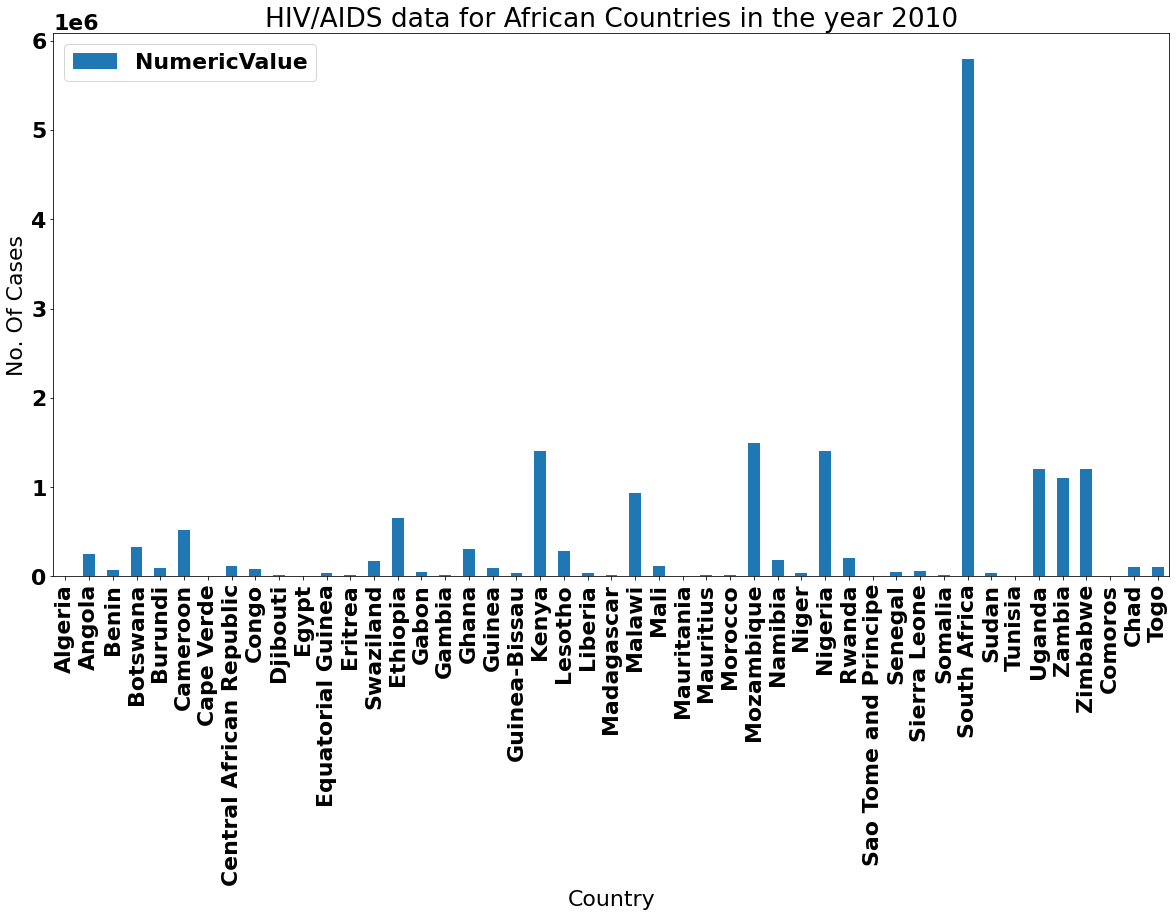

In [8]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
for i in range(2010,2020,1):
    df_plot = df1[(df1["TimeDim"] == i)]
    df_plot = df_plot.plot(x="Country", y="NumericValue", figsize=(20, 10), style=['o','rx'], kind='bar', title=f"HIV/AIDS data for African Countries in the year {i}",
                                   ylabel="No. Of Cases")
    
    # plt.plot(df_2010["Country"], df_2010["NumericValue"], figsize=(6, 10))
    # plt.figure(figsize=(6, 10))
    # df_2010.plot?

In [12]:
def _range(sample):
    return sample.max() - sample.min()

def iqr(sample):
    return sample.quantile(0.75) - sample.quantile(0.25)

def siqr(sample):
    return (sample.quantile(0.75) - sample.quantile(0.25))/2


measures = {
    'year':[],
    'mean':[],
    'standard_deviation':[],
    'variance':[],
    'median':[],
    'range':[],
    'iqr':[],
    'siqr':[]
    
    
}
for year in range (2010,2020):
    
    measures['year'].append(year)
    measures['mean'].append(df1[(df1["TimeDim"] == year)]['NumericValue'].mean())
    measures["standard_deviation"].append(df[(df["TimeDim"] == year)]['NumericValue'].std())
    measures["variance"].append(df[(df["TimeDim"] == year)]['NumericValue'].var())
    measures["median"].append(df[(df["TimeDim"] == year)]['NumericValue'].median())
    measures['range'].append(_range(df[(df["TimeDim"] == year)]['NumericValue']))
    measures['iqr'].append(iqr(df[(df["TimeDim"] == year)]['NumericValue']))
    measures['siqr'].append(siqr(df[(df["TimeDim"] == year)]['NumericValue']))
    
    df3 = pd.DataFrame.from_dict(measures)

In [13]:
df3

,year,mean,standard_deviation,variance,median,range,iqr,siqr
0,2010,398048.723404,618665.556658,3.827471e+11,24500.0,5799900.0,114400.0,57200.0
1,2011,407744.042553,640674.415186,4.104637e+11,26000.0,6099900.0,113550.0,56775.0
2,2012,415167.021277,653132.790798,4.265824e+11,27500.0,6299900.0,112825.0,56412.5
3,2013,426964.255319,675401.297809,4.561669e+11,29000.0,6599900.0,112375.0,56187.5
4,2014,435906.382979,692561.306488,4.796412e+11,29500.0,6799900.0,112150.0,56075.0
5,2015,447863.617021,709832.563235,5.038623e+11,29500.0,6999900.0,114450.0,57225.0
6,2016,454839.787234,725639.510837,5.265527e+11,30000.0,7199900.0,114150.0,57075.0
7,2017,464122.553191,742549.756067,5.513801e+11,31000.0,7399900.0,121250.0,60625.0
8,2018,470898.936170,754691.019025,5.695585e+11,32000.0,7499800.0,120925.0,60462.5
9,2019,475634.893617,769673.499846,5.923973e+11,32000.0,7699800.0,131150.0,65575.0


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


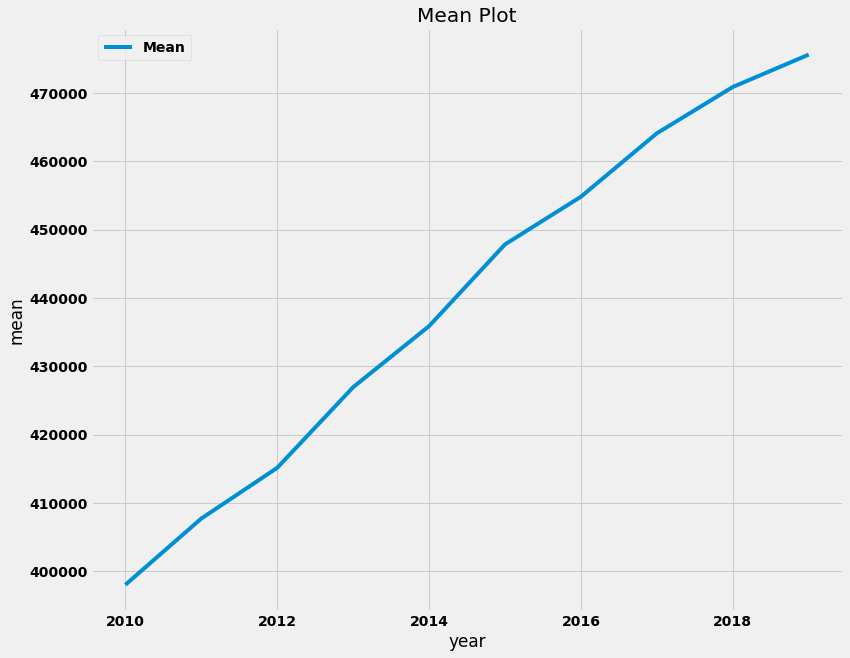

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 10))
plt.ylabel('mean')
plt.xlabel('year')
plt.title("Mean Plot")
plt.plot(df3['year'], df3['mean'], label='Mean')
plt.legend()

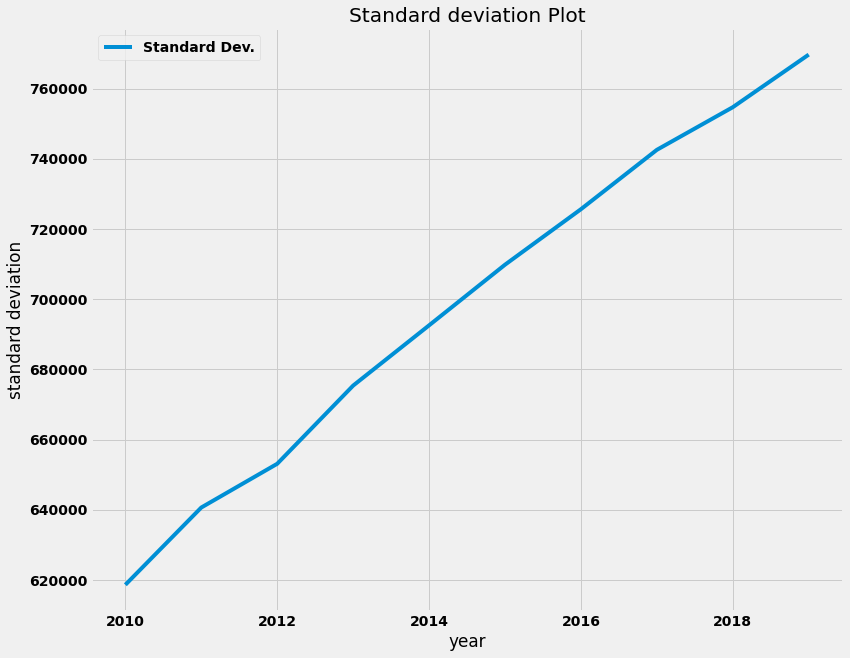

In [15]:
plt.figure(figsize=(12, 10))
plt.ylabel('standard deviation')
plt.xlabel('year')
plt.title("Standard deviation Plot")
plt.plot(df3['year'], df3['standard_deviation'], label='Standard Dev.')
plt.legend()

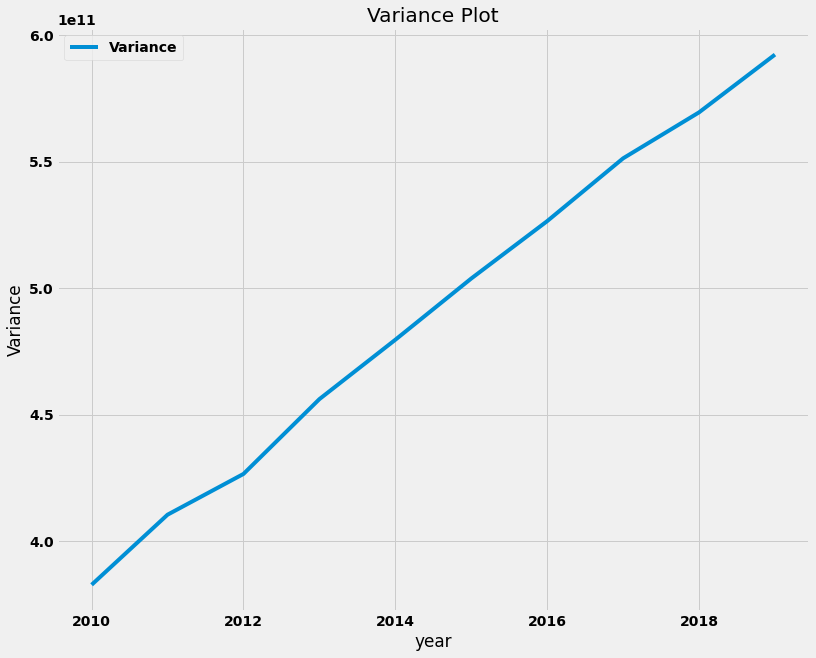

In [16]:
plt.figure(figsize=(12, 10))
plt.ylabel('Variance')
plt.xlabel('year')
plt.title("Variance Plot")
plt.plot(df3['year'], df3['variance'], label='Variance')
plt.legend()

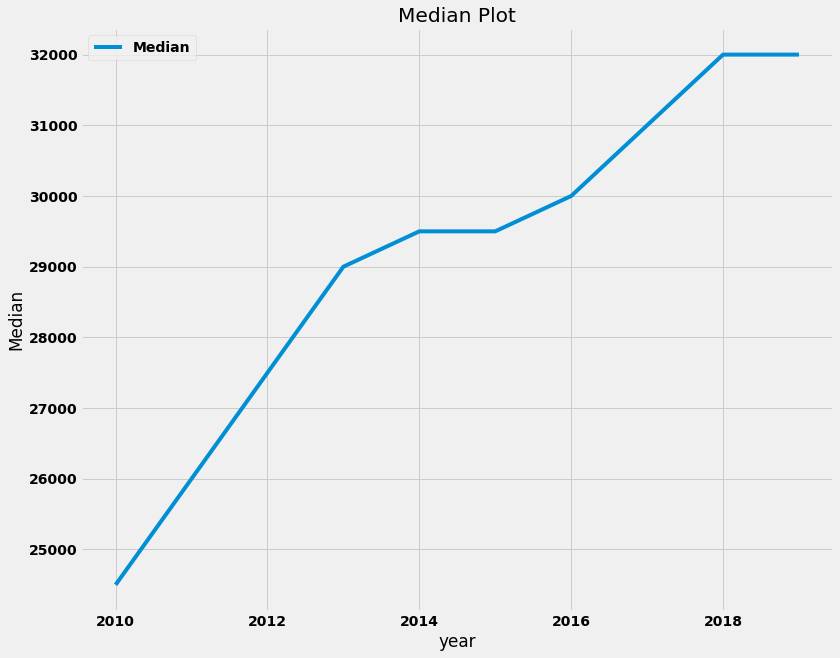

In [17]:
plt.figure(figsize=(12, 10))
plt.ylabel('Median')
plt.xlabel('year')
plt.title("Median Plot")
plt.plot(df3['year'], df3['median'], label='Median')
plt.legend()

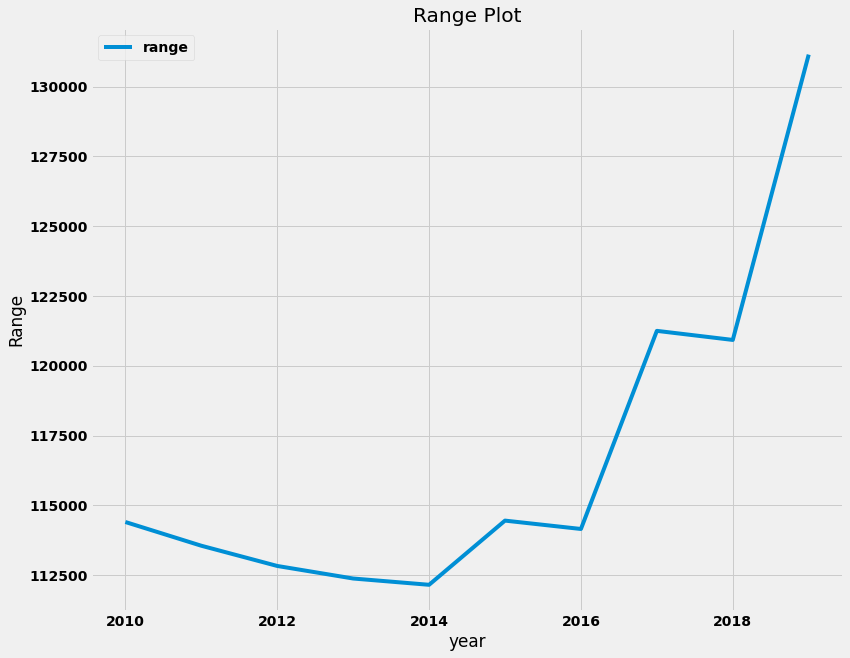

In [18]:
plt.figure(figsize=(12, 10))
plt.ylabel('Range')
plt.xlabel('year')
plt.title("Range Plot")
plt.plot(df3['year'], df3['iqr'], label='range')
plt.legend()

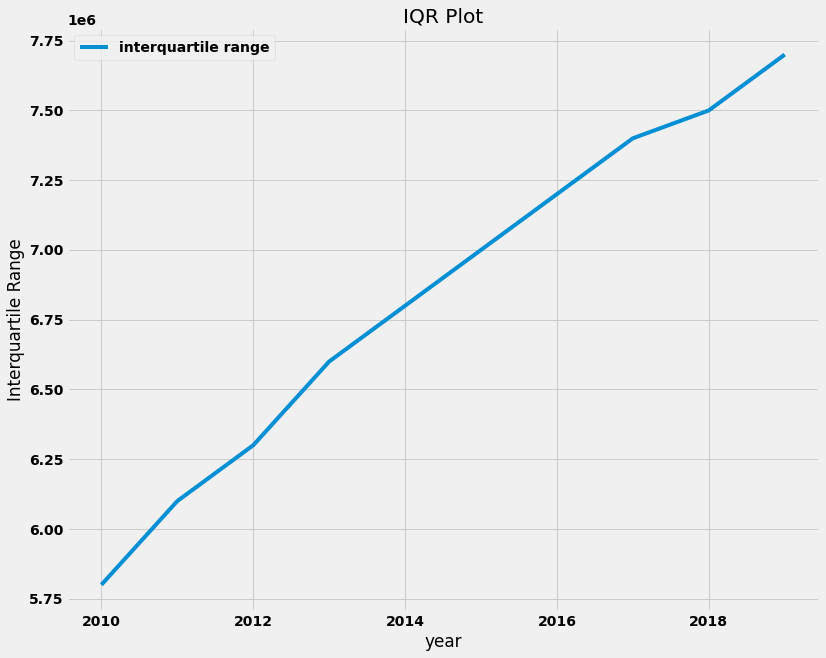

In [19]:
plt.figure(figsize=(12, 10))
plt.ylabel('Interquartile Range')
plt.xlabel('year')
plt.title("IQR Plot")
plt.plot(df3['year'], df3['range'], label='interquartile range')
plt.legend()

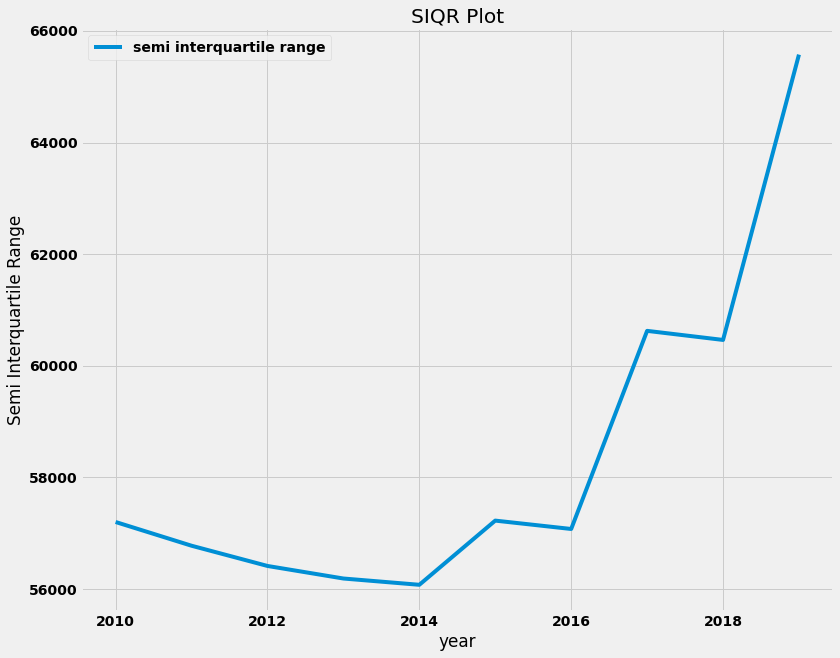

In [20]:
plt.figure(figsize=(12, 10))
plt.ylabel('Semi Interquartile Range')
plt.xlabel('year')
plt.title("SIQR Plot")
plt.plot(df3['year'], df3['siqr'], label='semi interquartile range')
plt.legend()

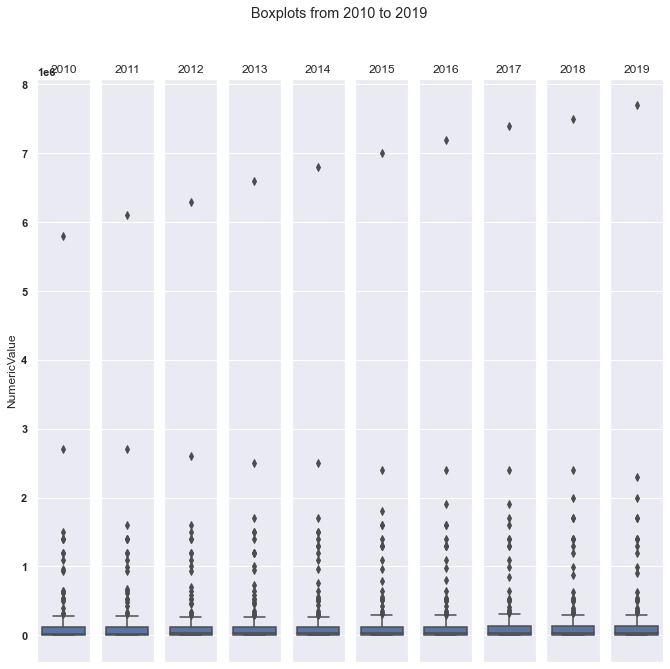

In [24]:
import seaborn as sns
sns.set()

fig, axes  = plt.subplots(1,10, figsize=(10,10), sharey=True)
fig.suptitle('Boxplots from 2010 to 2019')
axes[0].set_ylabel('Refugees')

for idx, year in enumerate(range(2010,2020)):
    sns.boxplot(ax = axes[idx], y = df[df['TimeDim'] == year]['NumericValue'])
    axes[idx].set_title(year)
    if idx > 0: axes[idx].set_ylabel('')